# PROJECT 3 DEEP LEARNING

BY : 
ANUGRAH AIDIN YOTOLEMBAH_F55120093_A

# A. RIVIEW DATA 
dalam bagian riview data, saya dapat menghasilkan informasi dari dataset yang telah kita masukkan, jumlah class pada dataset gambar

## 1. Import library

memasukkan library python package sesuai yang di pakai dalam kode program

In [19]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

## 2. Load dataset dan menentukan class gambar

memasukkan dataset gambar ke dalam kode program, yang nantinya di pakai untuk melakukan preprocessing gambar dan prediksi gambar jeruk masak dan tidak masak 

2.1. Menentukan nama dan jumlah class pada gambar

In [2]:
IMAGE_SIZE = 224
classes = 2

2.2. load dataset gambar  training menggunakan image data generator

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(
        '/Users/didiyotolembah19gmail.com/Documents/kuliah/semester 6/deep learning/DEEP LEARNING PROJECT 3/dataset jeruk/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse")

Found 199 images belonging to 2 classes.


2.3. load dataset gambar testing menggunakan image data generator 

In [4]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest")

test_generator = train_datagen.flow_from_directory(
        '/Users/didiyotolembah19gmail.com/Documents/kuliah/semester 6/deep learning/DEEP LEARNING PROJECT 3/dataset jeruk/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse")

Found 20 images belonging to 2 classes.


2.4. mengecek nama label berdasarkan data gambar

In [5]:
class_name = list(train_generator.class_indices.keys())
class_name

['jeruk masak', 'jeruk tidak masak']

### Conclusion bagian Riview Data

pada bagian riview data, kami telah melakukan riview data yang dalamnya berisi memasukkan library python yang sesuai dengan kode program yang kita buat, menentukan class gambar yang ingin kita pakai, memasukkan dataset gambar training dan testing menggunakan image generator, sehingga dapat di simpulkan bahwa pada dataset training dan testing gambar saya memakai 2 class yaitu class jeruk masak, dan class jeruk tidak masak, pada dataset gambar training terdapat 199 images dengan 2 class, dan pada dataset gambar pada testing terdapat 20 images dengan 2 class.  saya memakai image size dengan size 224, karna ukuran 224 merupakan ukuran panjang dan lebar pada gambar yang bisa di ketahui oleh mesin secara pixel.  

# B. DATA TRAINING DAN DATA PREPROCESSING

pada bagian ini kita akan melakukan preprocessing data gambar melalui membuat model arsitektur VGG16 secara manual, melakukan optimalisasi model, melakukan fit transform (training data, validasi data), menampilkan grafik visualisasi data pada accuracy dan loss .

## 1. membangun model arsitektur VGG16 secara manual

In [6]:
# membangun model
model = Sequential()

2023-05-26 22:08:11.709783: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# lapisan pertama
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# lapisan kedua
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# lapisan ketiga
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# lapisan keempat
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# lapisan kelima
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# lapisan padat
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## 2. melakukan optimalisasi model

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## 3. mengecek informasi dari layer yang telah di buat secara manual

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

## 4. fit transformasi pada model yang telah di buat sebelumnya

In [10]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=4,
    batch_size= 32,
    shuffle= True)

Epoch 1/4
7/7 [==============================] - 146s 20s/step - loss: 1.1867 - accuracy: 0.4874 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/4
7/7 [==============================] - 142s 20s/step - loss: 0.6943 - accuracy: 0.5025 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 3/4
7/7 [==============================] - 141s 20s/step - loss: 0.6934 - accuracy: 0.5025 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/4
7/7 [==============================] - 142s 20s/step - loss: 0.6937 - accuracy: 0.4523 - val_loss: 0.6931 - val_accuracy: 0.5000


## 5. membuat variabel baru untuk menginisialisasikan accuary dan loss model

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = 4

## 6. visualisasi data 
melakukan visualisasi data berdasarkan accuracy dan loss pada layer yang telah di lakukan training 

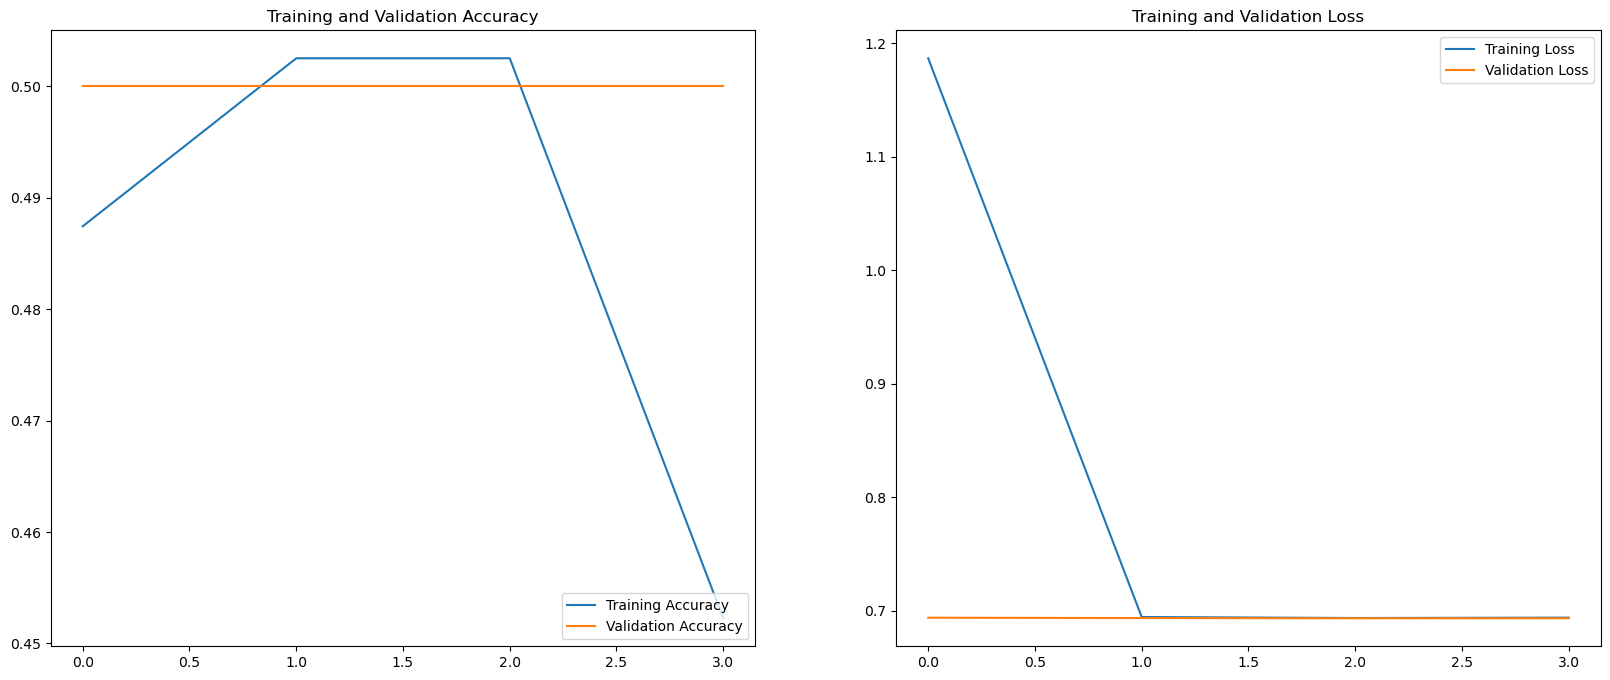

In [13]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# 7. Save model

In [11]:
filename = 'model_deep_project3.h5'
model.save(filename)

# C. DATA TESTING DAN PREDIKSI

1/1 [==============================] - 1s 642ms/step
Prediksi: jeruk masak
Predicted probability: 0.49965885281562805


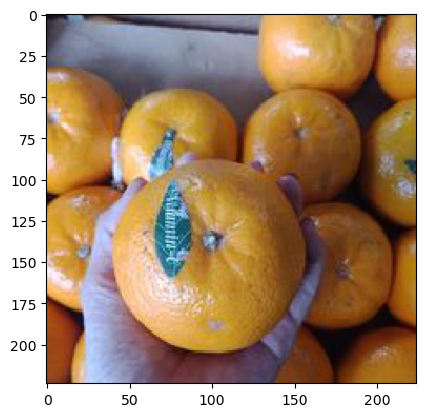

In [18]:
img_path = '/Users/didiyotolembah19gmail.com/Documents/kuliah/semester 6/deep learning/DEEP LEARNING PROJECT 3/dataset jeruk/test/jeruk masak/images1.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img)
plt.imshow(img.astype(np.uint8))

# melakukan preprocessing gambar
img = img / 255.0  # Normalize the pixel values
img = np.expand_dims(img, axis=0)  # Add the batch dimension


# memasukkan model yang telah di simpan dari project 1 
saved_model = load_model("model_deep_project3.h5")

# Melakukan prediksi pada model project 1
output = saved_model.predict(img)

# mendefinisikan class
class_labels = ['jeruk masak', 'jeruk tidak masak']

# menampilkan output hasil dari prediksi
predicted_class_idx = np.argmax(output)
predicted_class = class_labels[predicted_class_idx]
print(f"Prediksi: {predicted_class}")
print(f"Predicted probability: {output[0][predicted_class_idx]}")